In [ ]:
!wget -nc = "https://raw.githubusercontent.com/TreeBeeTea/dso_project/refs/heads/main/Spotify%20Most%20Streamed%20Songs.csv"
!wget -nc = "https://raw.githubusercontent.com/TreeBeeTea/dso_project/refs/heads/main/songs_normalize%20(2).csv"

--2024-12-03 08:05:43--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
File ‘Spotify Most Streamed Songs.csv’ already there; not retrieving.

--2024-12-03 08:05:44--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
File ‘songs_normalize (2).csv’ already there; not retrieving.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
song_df = pd.read_csv('Spotify Most Streamed Songs.csv')
song_df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [ ]:
song_df_2 = pd.read_csv('songs_normalize (2).csv')
song_df_2.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
numerical_cols = song_df_2.select_dtypes(include=np.number).columns
corr = song_df_2[numerical_cols].corr()  # Apply corr() to the numerical columns only
print(corr)

                  duration_ms      year  popularity  danceability    energy  \
duration_ms          1.000000 -0.316534    0.050617     -0.060057 -0.078763   
year                -0.316534  1.000000   -0.003825      0.033532 -0.108644   
popularity           0.050617 -0.003825    1.000000     -0.003546 -0.014021   
danceability        -0.060057  0.033532   -0.003546      1.000000 -0.104038   
energy              -0.078763 -0.108644   -0.014021     -0.104038  1.000000   
key                 -0.002560  0.007380    0.014823      0.032731 -0.003446   
loudness            -0.079912  0.017479    0.030632     -0.033315  0.651016   
mode                -0.003848 -0.007358   -0.021353     -0.067528 -0.040651   
speechiness          0.066998  0.001111    0.021162      0.145590 -0.057018   
acousticness         0.010923  0.033809    0.024619     -0.065429 -0.445469   
instrumentalness    -0.004208 -0.050265   -0.048059      0.023207  0.037861   
liveness             0.024941 -0.027037   -0.009856 

In [ ]:
song_df_2.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [ ]:
new_df = song_df_2.drop(columns=["duration_ms", "key", "mode", "speechiness", "acousticness", "instrumentalness", "valence", "tempo", "explicit"])
new_df['genre'] = new_df['genre'].str.split(',').str[0].str.strip()
new_df

,artist,song,year,popularity,danceability,energy,loudness,liveness,genre
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,-5.444,0.3550,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,-4.918,0.6120,rock
2,Faith Hill,Breathe,1999,66,0.529,0.496,-9.007,0.2510,pop
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,-4.063,0.3470,rock
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,-4.806,0.0845,pop
...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,2019,79,0.842,0.734,-5.065,0.1060,pop
1996,Taylor Swift,Cruel Summer,2019,78,0.552,0.702,-5.707,0.1050,pop
1997,Blanco Brown,The Git Up,2019,69,0.847,0.678,-8.635,0.2740,hip hop
1998,Sam Smith,Dancing With A Stranger (with Normani),2019,75,0.741,0.520,-7.513,0.2220,pop


In [ ]:
genre_count = new_df['genre'].value_counts()
print(genre_count)


genre
pop                  936
hip hop              776
rock                 162
Dance/Electronic      41
set()                 22
latin                 15
R&B                   13
country               11
World/Traditional     10
metal                  9
Folk/Acoustic          4
easy listening         1
Name: count, dtype: int64


In [ ]:
df_pop = new_df[new_df['genre'] == 'pop']
df_hiphop = new_df[new_df['genre'] == 'hip hop']
print(df_pop)
print(df_hiphop)


               artist                                    song  year  \
0      Britney Spears                  Oops!...I Did It Again  2000   
2          Faith Hill                                 Breathe  1999   
4              *NSYNC                             Bye Bye Bye  2000   
7     Robbie Williams                                 Rock DJ  2000   
8     Destiny's Child                             Say My Name  1999   
...               ...                                     ...   ...   
1992          Normani                              Motivation  2019   
1993       Joel Corry                                   Sorry  2019   
1995   Jonas Brothers                                  Sucker  2019   
1996     Taylor Swift                            Cruel Summer  2019   
1998        Sam Smith  Dancing With A Stranger (with Normani)  2019   

      popularity  danceability  energy  loudness  liveness genre  
0             77         0.751   0.834    -5.444    0.3550   pop  
2            

In [ ]:
rock = new_df[new_df['genre'] == 'rock']
metal = new_df[new_df['genre'] == 'metal']
df_rockmetal = pd.concat([rock, metal])
df_rockmetal.reset_index(drop=True, inplace=True)
df_rockmetal

,artist,song,year,popularity,danceability,energy,loudness,liveness,genre
0,blink-182,All The Small Things,1999,79,0.434,0.897,-4.918,0.612,rock
1,Bon Jovi,It's My Life,2000,78,0.551,0.913,-4.063,0.347,rock
2,Sting,Desert Rose,1999,62,0.586,0.659,-7.920,0.106,rock
3,Linkin Park,In the End,2000,83,0.556,0.864,-5.870,0.209,rock
4,Tom Jones,Sexbomb,1999,65,0.801,0.876,-3.940,0.104,rock
...,...,...,...,...,...,...,...,...,...
166,Limp Bizkit,Behind Blue Eyes,2003,70,0.595,0.489,-6.660,0.119,metal
167,The Rasmus,In the Shadows,2003,68,0.600,0.796,-4.481,0.484,metal
168,Evanescence,My Immortal,2003,72,0.190,0.265,-9.206,0.134,metal
169,Evanescence,Call Me When You're Sober,2006,65,0.450,0.883,-4.094,0.293,metal


In [ ]:
dance = new_df[new_df['genre'] == 'Dance/Electronic']
set1 = new_df[new_df['genre'] == 'set()']
latin = new_df[new_df['genre'] == 'latin']
rb = new_df[new_df['genre'] == 'R&B']
country = new_df[new_df['genre'] == 'country']
world = new_df[new_df['genre'] == 'World/Traditional']
folk = new_df[new_df['genre'] == 'Folk/Acoustic']
easy = new_df[new_df['genre'] == 'easy listening']

## other dataset
df_other = pd.concat([dance, set1, latin, rb, country, world, folk, easy])
df_other.reset_index(drop=True, inplace=True)
df_other

,artist,song,year,popularity,danceability,energy,loudness,liveness,genre
0,Modjo,Lady - Hear Me Tonight,2001,77,0.720,0.808,-5.627,0.0634,Dance/Electronic
1,Chicane,Don't Give Up,2016,47,0.644,0.720,-9.635,0.0839,Dance/Electronic
2,Madison Avenue,Don't Call Me Baby,1999,56,0.808,0.982,-6.588,0.3500,Dance/Electronic
3,iio,Rapture (feat.Nadia Ali),2006,54,0.661,0.855,-8.403,0.1990,Dance/Electronic
4,Roger Sanchez,Another Chance,2000,50,0.610,0.820,-10.029,0.1380,Dance/Electronic
...,...,...,...,...,...,...,...,...,...
112,Oasis,Go Let It Out,2000,0,0.408,0.849,-5.631,0.5600,Folk/Acoustic
113,Vanessa Carlton,A Thousand Miles,2002,75,0.560,0.825,-3.862,0.1610,Folk/Acoustic
114,Mumford & Sons,Little Lion Man,2009,68,0.517,0.492,-8.050,0.0873,Folk/Acoustic
115,Hozier,Take Me To Church,2014,81,0.566,0.664,-5.303,0.1160,Folk/Acoustic


In [ ]:
df_pop.reset_index(drop=True, inplace=True)
df_hiphop.reset_index(drop=True, inplace=True)
df_rockmetal.reset_index(drop=True, inplace=True)
df_other.reset_index(drop=True, inplace=True)


In [ ]:
df_pop.to_csv('pop_songs.csv', index=False)
df_hiphop.to_csv('hiphop.csv', index=False)
df_other.to_csv('other.csv', index=False)
df_rockmetal.to_csv('rockmetal.csv', index=False)


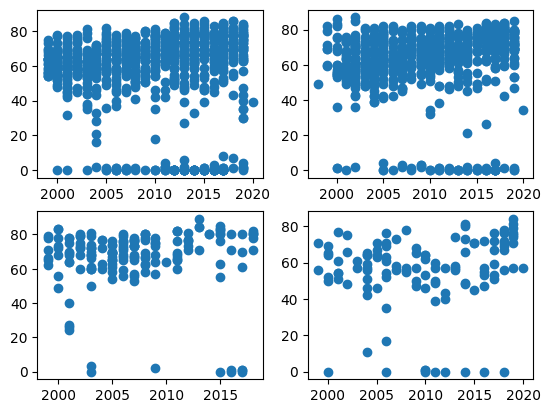

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(df_pop['year'], df_pop['popularity'])
ax[0,1].scatter(df_hiphop['year'], df_hiphop['popularity'])
ax[1,0].scatter(df_rockmetal['year'], df_rockmetal['popularity'])
ax[1,1].scatter(df_other['year'], df_other['popularity'])

In [ ]:
numerical_cols = df_hiphop.select_dtypes(include=np.number).columns
corr = df_hiphop[numerical_cols].corr()
print(corr)


                  year  popularity  danceability    energy  loudness  liveness
year          1.000000    0.056724     -0.030689 -0.082126 -0.031899 -0.005587
popularity    0.056724    1.000000      0.042910  0.045484  0.107660 -0.014763
danceability -0.030689    0.042910      1.000000 -0.225662 -0.145292 -0.167413
energy       -0.082126    0.045484     -0.225662  1.000000  0.675611  0.163399
loudness     -0.031899    0.107660     -0.145292  0.675611  1.000000  0.088660
liveness     -0.005587   -0.014763     -0.167413  0.163399  0.088660  1.000000


In [ ]:
import scipy.stats as stats

In [ ]:


# Concatenate the datasets into one DataFrame
df_all = pd.concat([df_hiphop, df_pop, df_rockmetal, df_other])


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
model = ols('popularity ~ C(genre)', data=df_all).fit()

# Perform the ANOVA to generate the ANOVA table
anova_results = anova_lm(model)
print(anova_results)

              df         sum_sq      mean_sq          F        PR(>F)
C(genre)     3.0   18803.139866  6267.713289  14.038356  4.674334e-09
Residual  1996.0  891155.347634   446.470615        NaN           NaN
